<a href="https://colab.research.google.com/github/MUbarak123-56/qiskit-work/blob/master/variational-algos/instances_extensions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q qiskit
!pip install -q pylatexenc
!pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 56.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /tmp/pip-req-build-3417_anv
  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/qiskit-textbook.git /tmp/pip-req-build-3417_anv
  Resolved https://github.com/qiskit-community/qiskit-textbook.git to commit 0ae9

### Variational Quantum Eigensolvers

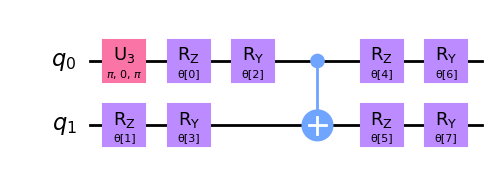

In [2]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit.library import TwoLocal
import numpy as np

theta_list = (2 * np.pi * np.random.rand(1, 8)).tolist()
observable = SparsePauliOp.from_list([("XX", 1), ("YY", -3)])

reference_circuit = QuantumCircuit(2)
reference_circuit.x(0)

variational_form = TwoLocal(
    2,
    rotation_blocks=["rz", "ry"],
    entanglement_blocks="cx",
    entanglement="linear",
    reps=1,
)
ansatz = reference_circuit.compose(variational_form)

ansatz.decompose().draw('mpl')

In [3]:
def cost_func_vqe(params, ansatz, hamiltonian, estimator):
    """Return estimate of energy from estimator

    Parameters:
        params (ndarray): Array of ansatz parameters
        ansatz (QuantumCircuit): Parameterized ansatz circuit
        hamiltonian (SparsePauliOp): Operator representation of Hamiltonian
        estimator (Estimator): Estimator primitive instance

    Returns:
        float: Energy estimate
    """
    cost = estimator.run(ansatz, hamiltonian, parameter_values=params).result().values[0]
    return cost

In [4]:
!pip install qiskit-ibm-runtime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.9/130.9 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.7/298.7 kB 12.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.9/242.9 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.4/143.4 kB 15.3 MB/s eta 0:00:00
  Created wheel for ibm-platform-services: filename=ibm_platform_services-0.44.1-py3-none-any.whl size=312832 sha256=0505f5add7fa2588aac5cf02d5e3461941329c7f968929d

In [5]:
%run cred.sh

<Figure size 640x480 with 0 Axes>

In [6]:
from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Session

# Add your token below
#service = QiskitRuntimeService(
#    channel="ibm_quantum"
#)

backend = service.backend("ibmq_qasm_simulator")
session = Session(backend=backend)

# Use estimator to get the expected values corresponding to each ansatz
estimator = Estimator(session=session)

In [7]:
# SciPy minimizer routine
from scipy.optimize import minimize

x0 = np.ones(8)

result = minimize(cost_func_vqe, x0, args=(ansatz, observable, estimator), method="COBYLA")

result

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -3.983
       x: [ 1.968e+00  1.302e+00  1.568e+00  3.086e+00  1.920e+00
           -1.174e+00  1.185e+00  1.858e+00]
    nfev: 99
   maxcv: 0.0

### Sub Space VQE

In [8]:
import numpy as np

def cost_func_ssvqe(params, initialized_anastz_list, weights, ansatz, hamiltonian, estimator):
    # """Return estimate of energy from estimator

    # Parameters:
    #     params (ndarray): Array of ansatz parameters
    #     initialized_anastz_list (list QuantumCircuit): Array of initialised ansatz with reference
    #     weights (list): List of weights
    #     ansatz (QuantumCircuit): Parameterized ansatz circuit
    #     hamiltonian (SparsePauliOp): Operator representation of Hamiltonian
    #     estimator (Estimator): Estimator primitive instance

    # Returns:
    #     float: Weighted energy estimate
    # """

    energies = []

    # Define SSVQE

    weighted_energy_sum = np.dot(energies, weights)
    return weighted_energy_sum

### Variational Quantum Deflation

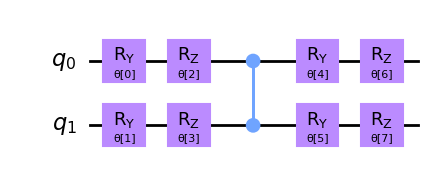

In [9]:
from qiskit.circuit.library import TwoLocal

ansatz = TwoLocal(2, rotation_blocks=["ry", "rz"], entanglement_blocks="cz", reps=1)

ansatz.decompose().draw('mpl')

In [10]:
from qiskit.circuit import ParameterVector

def calculate_overlap(circuits_1, circuits_2, parameters, sampler):

    def get_global_fidelity(probability_distribution):
        """Process the probability distribution of a measurement to determine the
        global fidelity.
        """
        return probability_distribution.get(0, 0)

    def create_fidelity_circuit(circuit_1, circuit_2):
        if len(circuit_1.clbits) > 0:
            circuit_1.remove_final_measurements()
        if len(circuit_2.clbits) > 0:
            circuit_2.remove_final_measurements()

        circuit = circuit_1.compose(circuit_2.inverse())
        circuit.measure_all()
        return circuit

    def construct_fidelity_circuits(circuits_1, circuits_2):
        """
        Constructs the list of fidelity circuits to be evaluated.
        These circuits represent the state overlap between pairs of input circuits,
        and their construction depends on the fidelity method implementations.
        """
        circuits = []
        for (circuit_1, circuit_2) in zip(circuits_1, circuits_2):
            # re-parametrize input circuits
            parameters_1 = ParameterVector("x", circuit_1.num_parameters)
            parametrized_circuit_1 = circuit_1.assign_parameters(parameters_1)
            parameters_2 = ParameterVector("y", circuit_2.num_parameters)
            parametrized_circuit_2 = circuit_2.assign_parameters(parameters_2)

            circuit = create_fidelity_circuit(
                parametrized_circuit_1, parametrized_circuit_2
            )
            circuits.append(circuit)

        return circuits

    circuits = construct_fidelity_circuits(circuits_1, circuits_2)

    job = sampler.run(circuits=circuits, parameter_values=parameters)
    result = job.result()

    raw_fidelities = [
        get_global_fidelity(prob_dist) for prob_dist in result.quasi_dists
    ]

    return np.clip(raw_fidelities, 0, 1).tolist()

In [11]:
# IBM Qiskit Runtime
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import Estimator, Sampler, Session

# Add your token below
#service = QiskitRuntimeService(channel='ibm_quantum')
backend = service.get_backend("ibmq_qasm_simulator")

session = Session(backend=backend)

estimator = Estimator(session=session)
sampler = Sampler(session=session)

In [12]:
import numpy as np

def cost_func_vqd(parameters, ansatz, prev_states, step, betas, estimator, sampler, hamiltonian):

    if len(parameters.shape) == 1:
        parameters = np.reshape(parameters, (-1, ansatz.num_parameters))

    batch_size = len(parameters)

    estimator_job = estimator.run(
        batch_size * [ansatz], batch_size * [hamiltonian], parameters
    )

    total_cost = np.zeros(batch_size)

    if step > 1:
        # compute overlap cost
        batched_prev_states = [state for state in prev_states for _ in range(batch_size)]
        costs = calculate_overlap(
            batch_size * [ansatz] * (step - 1),
            batched_prev_states,
            np.tile(parameters, (step - 1, 1)),
            sampler
        )

        costs = np.reshape(costs, (step - 1, -1))
        for state, cost in enumerate(costs):
            total_cost += np.real(betas[state] * cost)

    estimator_result = estimator_job.result()

    values = estimator_result.values + total_cost

    return values if len(values) > 1 else values[0]

In [13]:
from qiskit.quantum_info import SparsePauliOp

k = 3
betas = [33, 33, 33]
x0 = np.zeros(8)
observable = SparsePauliOp.from_list([("II", 2), ("XX", -2), ("YY", 3), ("ZZ", -3)])

prev_states = []
prev_opt_parameters = []
eigenvalues = []

In [14]:
from scipy.optimize import minimize

for step in range(1, k + 1):

    if step > 1:
        prev_states.append(ansatz.bind_parameters(prev_opt_parameters))

    result = minimize(cost_func_vqd, x0, args=(ansatz, prev_states, step, betas, estimator, sampler, observable), method="COBYLA")
    print(result)

    prev_opt_parameters = result.x
    eigenvalues.append(result.fun)

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -0.9714999999999998
       x: [-5.223e-05  4.278e-06 -5.725e-05  1.000e+00 -1.952e-05
           -3.403e-05 -1.088e-05  3.484e-05]
    nfev: 68
   maxcv: 0.0
 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -1.3614999999999995
       x: [-2.647e-01  1.612e+00  1.070e+00  1.626e-01  3.086e+00
            1.796e+00  5.512e-01  1.063e-01]
    nfev: 91
   maxcv: 0.0
 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: 5.5440000000000005
       x: [ 1.410e+00  1.525e+00 -5.782e-01  3.215e-01  3.051e-01
            1.538e+00 -3.942e-01  6.060e-02]
    nfev: 90
   maxcv: 0.0


In [15]:
eigenvalues

[-0.9714999999999998, -1.3614999999999995, 5.5440000000000005]

In [16]:
session.close()

### Quantum Sampling Regression